In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from roipoly import roipoly
import pylab as pl

ModuleNotFoundError: No module named 'roipoly'

In [2]:
# set data path
path_video = "/home/arpitdec5/Desktop/color_segmentation_using_gmm_and_em/data/detectbuoy.avi"

# define constants
cap = cv2.VideoCapture(path_video)

# read video
while(cap.isOpened()):
    ret, frame = cap.read()
    
    if(ret):
        # get current video frame
        # show the image
        pl.imshow(frame, interpolation='nearest', cmap="Greys")
        pl.colorbar()
        pl.title("left click: line segment         right click: close region")
        
        ROI1 = roipoly(roicolor='r')
        
        # show the image with the first ROI
        pl.imshow(frame, interpolation='nearest', cmap="Greys")
        pl.colorbar()
        ROI1.displayROI()
        pl.title('draw second ROI')
        break
    else:
        break
cap.release()
cv2.destroyAllWindows()

NameError: name 'pl' is not defined

In [3]:
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
files = glob.glob("/home/arpitdec5/Desktop/color_segmentation_using_gmm_and_em/data/buoy3/test/*")
print(files)

['/home/arpitdec5/Desktop/color_segmentation_using_gmm_and_em/data/buoy3/test/buoy32.png', '/home/arpitdec5/Desktop/color_segmentation_using_gmm_and_em/data/buoy3/test/buoy41.png', '/home/arpitdec5/Desktop/color_segmentation_using_gmm_and_em/data/buoy3/test/buoy31.png', '/home/arpitdec5/Desktop/color_segmentation_using_gmm_and_em/data/buoy3/test/buoy39.png', '/home/arpitdec5/Desktop/color_segmentation_using_gmm_and_em/data/buoy3/test/buoy35.png', '/home/arpitdec5/Desktop/color_segmentation_using_gmm_and_em/data/buoy3/test/buoy34.png', '/home/arpitdec5/Desktop/color_segmentation_using_gmm_and_em/data/buoy3/test/buoy33.png', '/home/arpitdec5/Desktop/color_segmentation_using_gmm_and_em/data/buoy3/test/buoy37.png', '/home/arpitdec5/Desktop/color_segmentation_using_gmm_and_em/data/buoy3/test/buoy38.png', '/home/arpitdec5/Desktop/color_segmentation_using_gmm_and_em/data/buoy3/test/buoy28.png', '/home/arpitdec5/Desktop/color_segmentation_using_gmm_and_em/data/buoy3/test/buoy30.png', '/home/ar

In [5]:
def plot_hist(image):
    # loop over the image channels
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    features = []
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        hist = hist / hist.sum()
        features.extend(hist)
        plt.plot(hist, color = color)
        plt.xlim([0, 256])

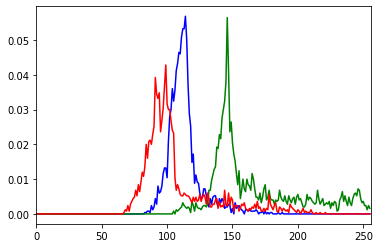

In [6]:
count = 0
for file in files:
    image = cv2.imread(files[7])
    plot_hist(image)
    count = count + 1
    
    if(count > 0):
        break

In [ ]:
# initialise step of em algorithm
def initialise(n, d, k):
    weights_gaussian = np.zeros(k)
    mean_gaussian = np.zeros(k, d)
    covariance_matrix_gaussian = np.zeros(k, d, d)
    probability_values = np.zeros(n, k)
    
    # randomly assign probability values
    for index in range(0, n):
        random_index = np.random.randint(0, k)
        probability_values[index][random_index] = 1